In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
from datetime import datetime
import cftime
import geopandas as gpd
from shapely.geometry import Point

In [4]:
ds = xr.open_dataset('../Data/ERA5/data_0.nc')
df0 = ds.to_dataframe().reset_index()
# list(ds.variables.values())[5].attrs
uh = list(ds.variables.keys())[5:]
ds.variables[uh[5]].attrs['long_name']

'100 metre U wind component'

In [5]:
ds = xr.open_dataset('../Data/ERA5/data_0.nc')
df0 = ds.to_dataframe().reset_index()
df0 = df0.drop(['number', 'expver'], axis = 1)
df0['valid_time'] = df0['valid_time'].apply(lambda x: datetime.strftime(x, '%Y:%m'))
vars = list(ds.variables.keys())[5:]
var_names = [ds.variables[var].attrs['long_name'] for var in vars]
ds = xr.open_dataset('../Data/ERA5/data_1.nc')
df1 = ds.to_dataframe().reset_index()
df1 = df1.drop(['number', 'expver'], axis = 1)
df1['valid_time'] = df1['valid_time'].apply(lambda x: datetime.strftime(x, '%Y:%m'))
vars1 = list(ds.variables.keys())[5:]
var_names1 = [ds.variables[var].attrs['long_name'] for var in vars1]
var_names = var_names + var_names1

In [6]:
df = pd.merge(
    left = df0,
    right = df1,
    left_on = ['valid_time', 'latitude', 'longitude'],
    right_on = ['valid_time', 'latitude', 'longitude'],
    how = 'inner'
    
)
df

,valid_time,latitude,longitude,cvh,sd,msl,tcc,t2m,u100,v100,sf,tp
0,1999:01,50.0,-126.00,0.985168,0.340097,101427.625,0.891158,273.044098,-0.414398,1.206120,0.008266,0.012535
1,1999:01,50.0,-125.75,0.985168,0.319999,101439.250,0.877089,273.180817,-0.273773,1.220768,0.008382,0.011815
2,1999:01,50.0,-125.50,0.993774,0.210206,101443.500,0.863494,274.635895,-0.617523,0.885319,0.005895,0.011305
3,1999:01,50.0,-125.25,0.993774,0.133781,101449.500,0.854247,275.149567,-1.039886,0.829166,0.004456,0.011398
4,1999:01,50.0,-125.00,0.000000,0.004451,101464.750,0.857955,277.208160,-2.237640,1.046940,0.000972,0.012280
...,...,...,...,...,...,...,...,...,...,...,...,...
5744875,2018:12,25.0,-68.00,0.000000,0.000000,102076.500,0.452579,297.685547,-4.638947,0.459660,0.000000,0.001032
5744876,2018:12,25.0,-67.75,0.000000,0.000000,102080.000,0.443897,297.697266,-4.586212,0.390812,0.000000,0.001072
5744877,2018:12,25.0,-67.50,0.000000,0.000000,102083.875,0.445941,297.705078,-4.536407,0.322941,0.000000,0.001099
5744878,2018:12,25.0,-67.25,0.000000,0.000000,102087.750,0.446140,297.679688,-4.500275,0.262394,0.000000,0.001144


In [7]:
print(var_names)

['High vegetation cover', 'Snow depth', 'Mean sea level pressure', 'Total cloud cover', '2 metre temperature', '100 metre U wind component', '100 metre V wind component', 'Snowfall', 'Total precipitation']


In [8]:
df_avg = df.groupby(['latitude', 'longitude']).mean().reset_index()
df_avg

C:\Users\omara\AppData\Local\Temp\ipykernel_16620\2939661239.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_avg = df.groupby(['latitude', 'longitude']).mean().reset_index()


,latitude,longitude,cvh,sd,msl,tcc,t2m,u100,v100,sf,tp
0,25.0,-126.00,0.000000,0.000000,101863.085938,0.752882,291.883606,-2.912823,-4.691815,0.000000,0.000361
1,25.0,-125.75,0.000000,0.000000,101857.070312,0.754288,291.865326,-2.828960,-4.727698,0.000000,0.000358
2,25.0,-125.50,0.000000,0.000000,101850.757812,0.752182,291.842468,-2.734917,-4.767798,0.000000,0.000347
3,25.0,-125.25,0.000000,0.000000,101844.492188,0.753118,291.816132,-2.635326,-4.807383,0.000000,0.000348
4,25.0,-125.00,0.000000,0.000000,101838.523438,0.751761,291.787079,-2.535123,-4.844121,0.000000,0.000343
...,...,...,...,...,...,...,...,...,...,...,...
23932,50.0,-68.00,0.994282,0.070930,101403.117188,0.706888,273.912292,1.313203,-0.813859,0.001135,0.002947
23933,50.0,-67.75,0.994282,0.077002,101394.867188,0.692750,273.938873,1.438199,-1.087215,0.001217,0.003056
23934,50.0,-67.50,0.996277,0.083958,101383.406250,0.671001,274.229492,1.722889,-1.373448,0.001323,0.003269
23935,50.0,-67.25,0.553101,0.073941,101368.000000,0.649283,275.214355,1.528366,-1.489402,0.001187,0.003075


([<matplotlib.axis.YTick at 0x23f2e80b520>,
 [Text(0, 0, '50.0'),
  Text(0, 25, '43.75'),
  Text(0, 50, '37.5'),
  Text(0, 75, '31.25'),
  Text(0, 100, '25.0')])

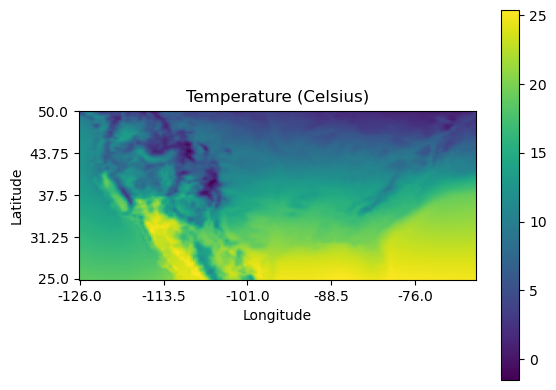

In [47]:
heat = df_avg[['latitude', 'longitude', 't2m']].to_numpy()
lat_len = len(np.unique(df_avg['latitude']))
lon_len = len(np.unique(df_avg['longitude']))
temp_grid = heat[:,2].reshape(lat_len, lon_len)
plt.imshow((temp_grid)[::-1, :] - 273.15)
plt.title('Temperature (Celsius)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
lonticks = [0, 50, 100, 150, 200]
plt.xticks(labels = np.unique(df_avg['longitude'])[lonticks], ticks = lonticks)
latticks = [0, 25, 50, 75, 100]
plt.yticks(labels = np.unique(df_avg['latitude'])[::-1][latticks], ticks = latticks)


([<matplotlib.axis.YTick at 0x23f2e5cee80>,
 [Text(0, 0, '50.0'),
  Text(0, 25, '43.75'),
  Text(0, 50, '37.5'),
  Text(0, 75, '31.25'),
  Text(0, 100, '25.0')])

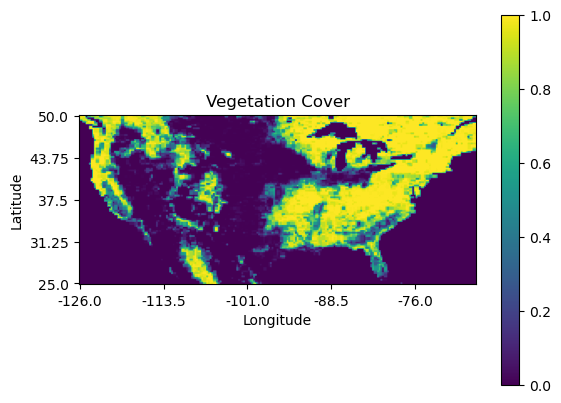

In [44]:
heat = df_avg[['latitude', 'longitude', 'cvh']].to_numpy()
lat_len = len(np.unique(df_avg['latitude']))
lon_len = len(np.unique(df_avg['longitude']))
temp_grid = heat[:,2].reshape(lat_len, lon_len)
plt.imshow((temp_grid)[::-1, :])
plt.title('Vegetation Cover')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
lonticks = [0, 50, 100, 150, 200]
plt.xticks(labels = np.unique(df_avg['longitude'])[lonticks], ticks = lonticks)
latticks = [0, 25, 50, 75, 100]
plt.yticks(labels = np.unique(df_avg['latitude'])[::-1][latticks], ticks = latticks)


([<matplotlib.axis.YTick at 0x23f2e68d970>,
 [Text(0, 0, '50.0'),
  Text(0, 25, '43.75'),
  Text(0, 50, '37.5'),
  Text(0, 75, '31.25'),
  Text(0, 100, '25.0')])

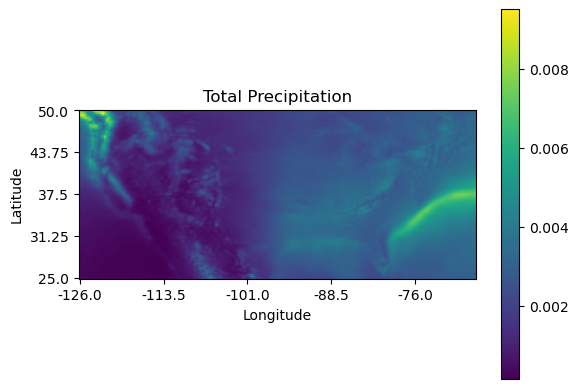

In [45]:
heat = df_avg[['latitude', 'longitude', 'tp']].to_numpy()
lat_len = len(np.unique(df_avg['latitude']))
lon_len = len(np.unique(df_avg['longitude']))
temp_grid = heat[:,2].reshape(lat_len, lon_len)
plt.imshow((temp_grid)[::-1, :])
plt.title('Total Precipitation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
lonticks = [0, 50, 100, 150, 200]
plt.xticks(labels = np.unique(df_avg['longitude'])[lonticks], ticks = lonticks)
latticks = [0, 25, 50, 75, 100]
plt.yticks(labels = np.unique(df_avg['latitude'])[::-1][latticks], ticks = latticks)


In [ ]:
heat = df_avg[['latitude', 'longitude', 'sd']].to_numpy()
lat_len = len(np.unique(df_avg['latitude']))
lon_len = len(np.unique(df_avg['longitude']))
temp_grid = heat[:,2].reshape(lat_len, lon_len)
plt.imshow((temp_grid)[::-1, :] - 273.15)
plt.title('US Temperature (Celsius)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
lonticks = [0, 50, 100, 150, 200]
plt.xticks(labels = np.unique(df_avg['longitude'])[lonticks], ticks = lonticks)
latticks = [0, 25, 50, 75, 100]
plt.yticks(labels = np.unique(df_avg['latitude'])[::-1][latticks], ticks = latticks)


In [19]:
shape_path = '../Data/USshape/cb_2023_us_state_500k.shp'
shape = gpd.read_file(shape_path)
shape = shape.dropna()
shape = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

In [20]:
geometry = [Point(xy) for xy in zip(df_avg['longitude'], df_avg['latitude'])]
gdf = gpd.GeoDataFrame(df_avg, geometry=geometry, crs="EPSG:4326")

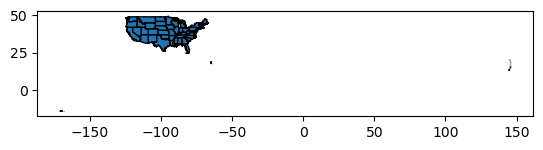

In [21]:
ax = shape.plot(edgecolor = 'black')
# gpd.kdeplot(gdf, ax = ax, shade = True)

# Dataset Summary
Monthly climate data filtered for the United States. Includes temperature, snow depth/cover, precipitation, and cloud coverage.

# Source
https://fabienmaussion.info/climate_system/download.html